In [0]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

import os
import random
import gc

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# !cd /content/drive/My\ Drive/minor\ dbretno  && git clone https://github.com/javathunderman/retinopathy-dataset.git

Cloning into 'retinopathy-dataset'...
remote: Enumerating objects: 2072, done.
remote: Total 2072 (delta 0), reused 0 (delta 0), pack-reused 2072
Receiving objects: 100% (2072/2072), 1.84 GiB | 24.17 MiB/s, done.
Resolving deltas: 100% (1/1), done.
Checking out files: 100% (2064/2064), done.


In [0]:
# i = 0
# dir = "/content/drive/My Drive/minor dbretno/retinopathy-dataset/nosymptoms/"
# for filename in os.listdir(dir):
#   if os.path.getsize(dir+filename) == 0:
#     print(filename)

In [0]:
sym = "/content/drive/My Drive/minor dbretno/retinopathy-dataset/symptoms/"
nosym = "/content/drive/My Drive/minor dbretno/retinopathy-dataset/nosymptoms/"

train_sym = ["/content/drive/My Drive/minor dbretno/retinopathy-dataset/symptoms/{}".format(i) for i in os.listdir(sym) if 'symptom' in i]
train_nosym = ["/content/drive/My Drive/minor dbretno/retinopathy-dataset/nosymptoms/{}".format(i) for i in os.listdir(nosym) if 'nosymptom' in i]

train_imgs = train_sym + train_nosym
random.shuffle(train_imgs)
print(len(train_imgs))
print(len(train_sym))
print(len(train_nosym))
del train_sym
del train_nosym

gc.collect()

1705
595
1110


691

/content/drive/My Drive/minor dbretno/retinopathy-dataset/nosymptoms/nosymptom_267.jpeg


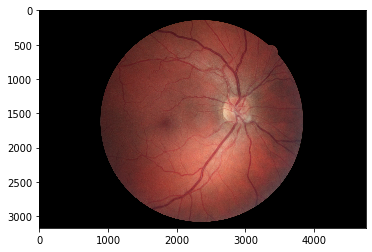

/content/drive/My Drive/minor dbretno/retinopathy-dataset/nosymptoms/nosymptom_843.jpeg


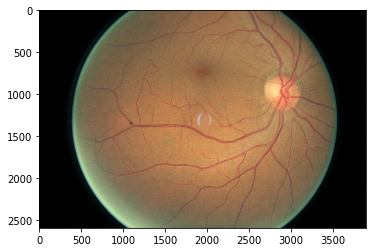

/content/drive/My Drive/minor dbretno/retinopathy-dataset/symptoms/symptom_148.jpeg


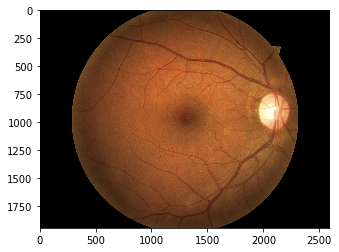

In [0]:
for ima in train_imgs[0:3]:
    print(ima)
    img = mpimg.imread(ima)
    imgplot = plt.imshow(img)
    plt.show()

In [0]:
nrows = 512
ncols = 512
channels = 3

def process_data(imgs):
    img_vals = []
    img_labels = []
    i = 0
    for image in imgs:
        i+=1
        print(i)
        img_vals.append(cv2.resize(cv2.imread(image,cv2.IMREAD_UNCHANGED), (nrows,ncols), interpolation=cv2.INTER_CUBIC))
        if 'nosymptom' in image:
            img_labels.append(0)
        else:
            img_labels.append(1)
    
    return img_vals,img_labels

In [0]:
img_vals , img_labels = process_data(train_imgs)

In [0]:
img_vals = np.array(img_vals)
img_labels = np.array(img_labels)
print(img_labels)
from sklearn.model_selection import train_test_split
img_train, img_val, labels_train, labels_val = train_test_split(img_vals, img_labels, test_size = 0.2, random_state = 2)

print(img_train.shape)
print(img_val.shape)
print(labels_train.shape)
print(labels_val.shape)

[0 0 1 ... 0 0 1]
(1364, 512, 512, 3)
(341, 512, 512, 3)
(1364,)
(341,)


In [0]:
del img_vals
del img_labels
gc.collect()

ntrain = len(img_train)
nval = len(img_val)

batch_size = 32

In [0]:
# Starting train / backend  process from here

from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img

Using TensorFlow backend.


In [0]:
model = models.Sequential(name="DR_Minor")
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(512,512,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
model.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['acc'])
model.summary()



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "DR_Minor"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 510, 510, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 255, 255, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 253, 253, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 126, 126, 64)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 124, 124, 128)     73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 62, 62, 128)       0         
____________________________

In [0]:
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)

In [0]:
train_generator = train_datagen.flow(img_train, labels_train, batch_size=batch_size)
val_generator = val_datagen.flow(img_val, labels_val, batch_size=batch_size)

In [0]:
history = model.fit_generator(train_generator, steps_per_epoch=ntrain // batch_size, epochs=10, validation_data=val_generator, validation_steps=nval // batch_size)




Epoch 1/10





42/42 [==============================] - 62s 1s/step - loss: 0.6348 - acc: 0.6491 - val_loss: 0.6220 - val_acc: 0.6562
Epoch 2/10
42/42 [==============================] - 59s 1s/step - loss: 0.6124 - acc: 0.6521 - val_loss: 0.5914 - val_acc: 0.6861
Epoch 3/10
42/42 [==============================] - 59s 1s/step - loss: 0.6012 - acc: 0.6597 - val_loss: 0.6277 - val_acc: 0.6472
Epoch 4/10
42/42 [==============================] - 58s 1s/step - loss: 0.5989 - acc: 0.6639 - val_loss: 0.6090 - val_acc: 0.6634
Epoch 5/10
42/42 [==============================] - 58s 1s/step - loss: 0.5980 - acc: 0.6820 - val_loss: 0.6221 - val_acc: 0.6537
Epoch 6/10
42/42 [==============================] - 58s 1s/step - loss: 0.5913 - acc: 0.6823 - val_loss: 0.6022 - val_acc: 0.6990
Epoch 7/10
42/42 [==============================] - 57s 1s/step - loss: 0.5938 - acc: 0.6856 - val_loss: 0.6271 - val_acc: 0.6958
Epoch 8/10
42/42 [==============================] - 57s 1s/step - loss: 0.5828 - a

In [0]:
!python --version

Python 3.6.8


In [0]:
from sklearn.metrics import classification_report, confusion_matrix

Y_pred = model.predict_generator(val_generator, nval // batch_size+1)
y_pred = []
for i in range(len(Y_pred)):
  if Y_pred[i][0] > 0.50:
    y_pred.append(1)
  else:
    y_pred.append(0)
print('Confusion Matrix')
# print(Y_pred)
print(confusion_matrix(labels_val, y_pred))
print("-------------------")
print("\n\nClassification Report")
print(classification_report(labels_val,y_pred))

Confusion Matrix
[[140  83]
 [ 71  47]]
-------------------


Classification Report
              precision    recall  f1-score   support

           0       0.66      0.63      0.65       223
           1       0.36      0.40      0.38       118

    accuracy                           0.55       341
   macro avg       0.51      0.51      0.51       341
weighted avg       0.56      0.55      0.55       341



In [0]:
model.save_weights('/content/drive/My Drive/minor dbretno/model_weight.h5')
model.save('/content/drive/My Drive/minor dbretno/model_keras.h5')

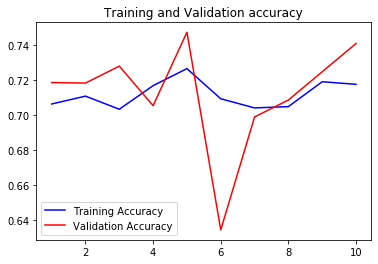

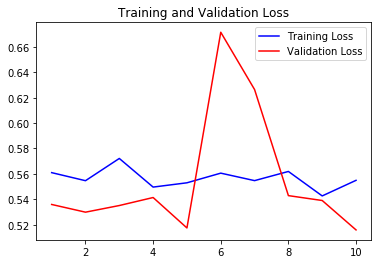

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc,'b', label="Training Accuracy")
plt.plot(epochs, val_acc, 'r', label="Validation Accuracy")
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss,'b', label="Training Loss")
plt.plot(epochs, val_loss, 'r', label="Validation Loss")
plt.title('Training and Validation Loss')
plt.legend()

In [0]:
# test_dir = "/content/"
# test_images = ["/content/{}".format(i) for i in os.listdir(test_dir) if '2243' in i]
# for ima in test_images:
#     img = mpimg.imread(ima)
#     imgplot = plt.imshow(img)
#     plt.show()
# img_test, y_test = process_data(test_images)
# img_t = np.array(img_test)
# test_datagen = ImageDataGenerator(rescale=1./255)
import tensorflow.keras
model = tensorflow.keras.models.load_model("/content/keras_model.h5")

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
`normal` is a deprecated alias for `truncated_normal`


In [0]:
from keras.preprocessing import image

test_image = image.load_img("/content/145_left.jpeg", target_size = (224, 224)) 
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)


print(model.predict(test_image))

[[0.9697066  0.03029345]]
